In [2]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [11]:
#Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
weather_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_url

'http://api.openweathermap.org/data/2.5/weather?appid=5a4d19ee4f4fb4763bce2fe51035b5c0&units=imperial&q='

In [15]:
# lists to hold data
names = []
temp = []
resp_obj=[]
lat=[]
long=[]
cloudiness=[]
windspeed=[]
humidity=[]
country=[]
date=[]

# Loop and request for data on each city
for i,city in enumerate(cities):
    try: 
        response = requests.get(weather_url + city).json()
        resp_obj.append(response)
        names.append(response['name'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing Record {i+1} {city}')
    except:
        print(f'Record not found. skipping...')

Processing Record 1 chokurdakh
Processing Record 2 saint-philippe
Processing Record 3 saldanha
Processing Record 4 fortuna
Processing Record 5 kaitangata
Processing Record 6 lakatoro
Processing Record 7 rikitea
Processing Record 8 bengkulu
Processing Record 9 clyde river
Processing Record 10 vanavara
Processing Record 11 punta arenas
Processing Record 12 hermanus
Processing Record 13 la ronge
Record not found. skipping...
Processing Record 15 narsaq
Processing Record 16 solikamsk
Processing Record 17 nanortalik
Processing Record 18 port elizabeth
Processing Record 19 atuona
Processing Record 20 srednekolymsk
Processing Record 21 inhambane
Processing Record 22 hithadhoo
Record not found. skipping...
Processing Record 24 bredasdorp
Processing Record 25 mchinji
Processing Record 26 caravelas
Processing Record 27 bereda
Processing Record 28 hasaki
Processing Record 29 avera
Processing Record 30 vaini
Processing Record 31 atar
Processing Record 32 jesus maria
Processing Record 33 vangaindra

Processing Record 268 kodinsk
Processing Record 269 north bend
Processing Record 270 broome
Processing Record 271 haines junction
Processing Record 272 nara
Processing Record 273 santarem
Processing Record 274 sohag
Processing Record 275 broken hill
Processing Record 276 san bartolome de tirajana
Processing Record 277 carnot
Processing Record 278 sirpur
Processing Record 279 paoua
Processing Record 280 adwa
Processing Record 281 makakilo city
Processing Record 282 alofi
Processing Record 283 tura
Processing Record 284 kathmandu
Processing Record 285 skjervoy
Processing Record 286 estelle
Record not found. skipping...
Processing Record 288 constitucion
Processing Record 289 kristiansund
Record not found. skipping...
Processing Record 291 manaure
Record not found. skipping...
Record not found. skipping...
Processing Record 294 mareeba
Processing Record 295 warri
Processing Record 296 iqaluit
Processing Record 297 the valley
Processing Record 298 grand gaube
Record not found. skipping...


Processing Record 535 tucuman
Processing Record 536 fort frances
Processing Record 537 christchurch
Processing Record 538 maragogi
Processing Record 539 leningradskiy
Processing Record 540 pangnirtung
Processing Record 541 abu kamal
Processing Record 542 port shepstone
Processing Record 543 abapo
Processing Record 544 kalmunai
Processing Record 545 northam
Processing Record 546 moron
Processing Record 547 san patricio
Processing Record 548 itarema
Processing Record 549 shingu
Record not found. skipping...
Processing Record 551 sakakah
Processing Record 552 todos santos
Processing Record 553 tombouctou
Processing Record 554 snasa
Processing Record 555 wahiawa
Record not found. skipping...
Processing Record 557 iralaya
Processing Record 558 kailua
Processing Record 559 wilmington
Processing Record 560 sao sebastiao
Record not found. skipping...
Processing Record 562 goderich
Processing Record 563 aguas formosas
Processing Record 564 turukhansk
Processing Record 565 marzuq
Processing Reco

In [19]:
#Convert Raw Data to DataFrame and export the city data into a .csv.
weather_dict = {
    "city": names,
    "temp": temp,
    "country":country,
    "date":date,
    "latitude":lat,
    "longitude":long,
    "cloudiness":cloudiness,
    "humidity":humidity,
    "wind speed":windspeed   
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('output_data/weather_data.csv')
weather_data.head()

,city,temp,country,date,latitude,longitude,cloudiness,humidity,wind speed
0,Chokurdakh,-47.76,RU,1639071633,70.6333,147.9167,87,100,2.73
1,Saint-Philippe,78.39,RE,1639071725,-21.3585,55.7679,55,78,12.33
2,Saldanha,69.85,ZA,1639071475,-33.0117,17.9442,81,91,23.40
3,Fortuna,48.36,US,1639071725,40.5982,-124.1573,1,80,1.99
4,Kaitangata,55.92,NZ,1639071725,-46.2817,169.8464,94,81,3.71


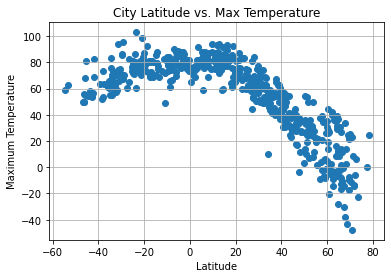

In [82]:
# Plotting the Data

# A scatter plot of latitude vs. temperature
lat_x = np.array(weather_data['latitude'])
temp_y = np.array(weather_data['temp'])
plt.scatter(lat_x,temp_y)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.savefig("CitylatvsTemp.png")
plt.show()

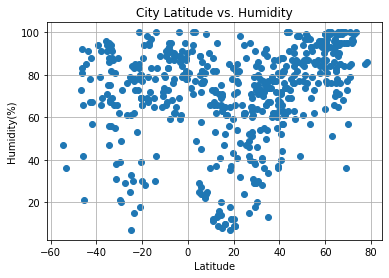

In [83]:
# A scatter plot of Latitude vs. Humidity
lat_x = np.array(weather_data['latitude'])
hum_y = np.array(weather_data['humidity'])
plt.scatter(lat_x,hum_y)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.savefig('CitylatvsHum')
plt.show()

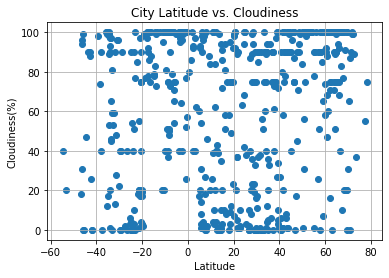

In [84]:
# A scatter plot of Latitude vs. Cloudiness 
lat_x = np.array(weather_data['latitude'])
cloud_y = np.array(weather_data['cloudiness'])
plt.scatter(lat_x,cloud_y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.savefig('citylatvsCloudiness')
plt.show()

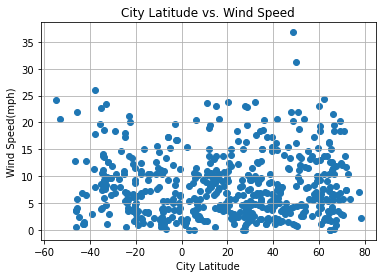

In [85]:
# A scatter plot of Latitude vs. Wind Speed
lat_x = np.array(weather_data['latitude'])
cloud_y = np.array(weather_data['wind speed'])
plt.scatter(lat_x,cloud_y)
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.savefig('citylatvsWind')
plt.show()

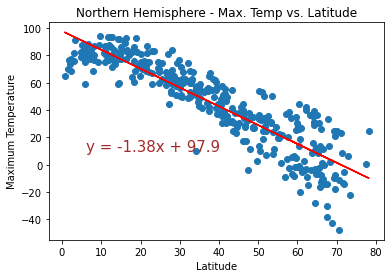

The r value is:


-0.8964463531501922

In [86]:
#Linear Regression
north_hem_df = weather_data.loc[weather_data["latitude"] >= 0,:]
south_hem_df = weather_data.loc[weather_data["latitude"] < 0,:]

#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
latitude_x = np.array(north_hem_df['latitude'])
temp_y = np.array(north_hem_df['temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_x, temp_y)
regress_values = latitude_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_x,temp_y)
plt.plot(latitude_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="brown")
plt.title('Northern Hemisphere - Max. Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature') 
plt.savefig('Northen_Hem Max Temp vs Lat')
plt.show()
print('The r value is:')
result.rvalue

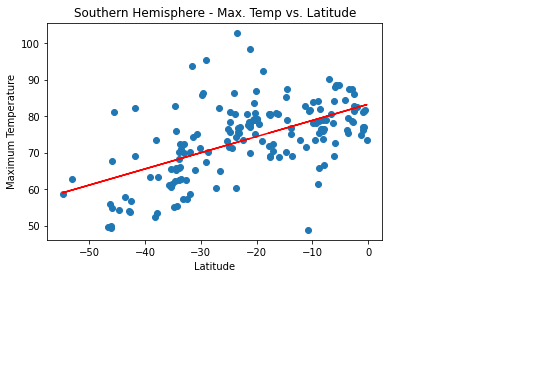

The r value is:


-0.8964463531501922

In [87]:
#southern Hemisphere - Max Temp vs. Latitude Linear Regression
latitude_x = np.array(south_hem_df['latitude'])
temp_y = np.array(south_hem_df['temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_x, temp_y)
regress_values = latitude_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_x,temp_y)
plt.plot(latitude_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="brown")
plt.title('Southern Hemisphere - Max. Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig('Southern_hem Max Temp vs Lat')
plt.show()
print('The r value is:')
result.rvalue

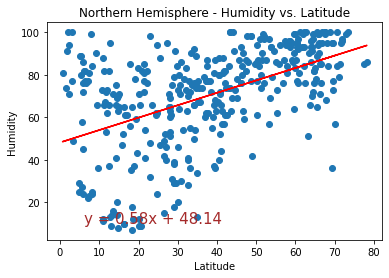

The r value is:


-0.8964463531501922

In [88]:
#Northern Hemisphere - Humidity vs. Latitude Linear Regression
latitude_x = np.array(north_hem_df['latitude'])
humidity_y = np.array(north_hem_df['humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_x, humidity_y)
regress_values = latitude_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_x,humidity_y)
plt.plot(latitude_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="brown")
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity') 
plt.savefig('Northern_hem Humidity vs lat')
plt.show()
print('The r value is:')
result.rvalue

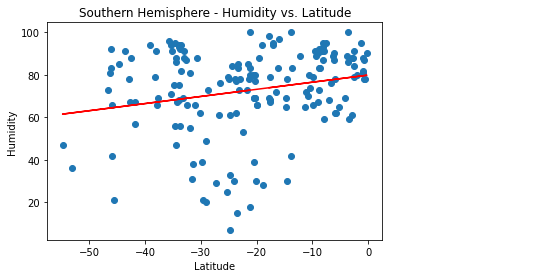

The r value is:


<Figure size 432x288 with 0 Axes>

In [72]:
#southern Hemisphere - Humidity vs. Latitude Linear Regression
latitude_x = np.array(south_hem_df['latitude'])
humidity_y = np.array(south_hem_df['humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_x, humidity_y)
regress_values = latitude_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_x,humidity_y)
plt.plot(latitude_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="brown")
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity') 
plt.show()
print('The r value is:')
result.rvalue
plt.savefig('Southern_hem Humidity vs lat')

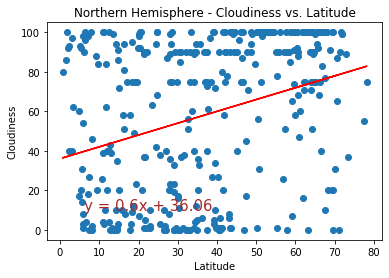

The r value is:


-0.8964463531501922

In [89]:
#Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
latitude_x = np.array(north_hem_df['latitude'])
cloudiness_y = np.array(north_hem_df['cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_x, cloudiness_y)
regress_values = latitude_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_x,cloudiness_y)
plt.plot(latitude_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="brown")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness') 
plt.savefig('Northern_hem Cloudiness vs lat')
plt.show()
print('The r value is:')
result.rvalue

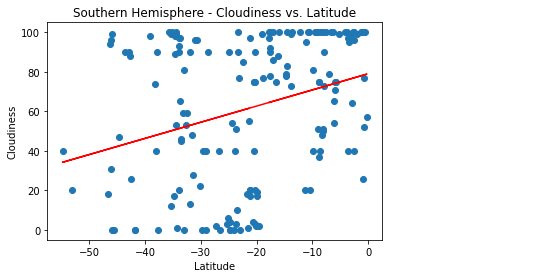

The r value is:


-0.8964463531501922

In [90]:
#southern Hemisphere - Cloudiness vs. Latitude Linear Regression
latitude_x = np.array(south_hem_df['latitude'])
cloudiness_y = np.array(south_hem_df['cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_x, cloudiness_y)
regress_values = latitude_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_x,cloudiness_y)
plt.plot(latitude_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="brown")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Southern_hem Cloudiness vs lat')
plt.show()
print('The r value is:')
result.rvalue

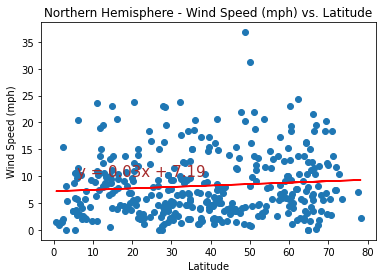

The r value is:


-0.8964463531501922

In [91]:
#Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
latitude_x = np.array(north_hem_df['latitude'])
windspeed_y = np.array(north_hem_df['wind speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_x, windspeed_y)
regress_values = latitude_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_x,windspeed_y)
plt.plot(latitude_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="brown")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)') 
plt.savefig('Northern_hem wind speed vs lat')
plt.show()
print('The r value is:')
result.rvalue

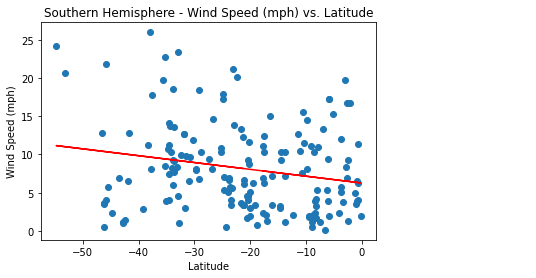

The r value is:


-0.8964463531501922

In [92]:
#southern Hemisphere - Wind Speed vs. Latitude Linear Regression
latitude_x = np.array(south_hem_df['latitude'])
windspeed_y = np.array(south_hem_df['wind speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_x, windspeed_y)
regress_values = latitude_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_x,windspeed_y)
plt.plot(latitude_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="brown")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('southern_hem wind vs lat')
plt.show()
print('The r value is:')
result.rvalue